In [36]:
import numpy as np
import importlib
import matplotlib.pyplot as plt 
import plots
from colour import Color

%matplotlib inline
%reload_ext sql
%reload_ext matplotlib
%sql postgresql://postgres@localhost:5432/javabench


'Connected: postgres@javabench'

In [ ]:
#         target         |                  id                  | count 
# mongo-javabenchmark    | b2b9f160-48cb-ca90-e3cf-a97303c30866 |  3600
# postgres-javabenchmark | e0b18a72-8b1a-0810-e1b8-05b237429ba8 |  3601

In [ ]:
#javabench=# select * from javabench_tx limit 5;
#       target        |                  id                  |             node             | bench_type  |   stamp    | count | mean_rate  | m1_rate | m5_rate | m15_rate |   rate_unit   
#---------------------+--------------------------------------+------------------------------+-------------+------------+-------+------------+---------+---------+----------+---------------
# mongo-javabenchmark | b2b9f160-48cb-ca90-e3cf-a97303c30866 | client-mongo-javabenchmark-1 | threads-100 | 1558129088 |    71 |  77.819429 |       0 |       0 |        0 | events/second
# mongo-javabenchmark | b2b9f160-48cb-ca90-e3cf-a97303c30866 | client-mongo-javabenchmark-1 | threads-100 | 1558129089 |   198 | 103.637785 |       0 |       0 |        0 | events/second
# mongo-javabenchmark | b2b9f160-48cb-ca90-e3cf-a97303c30866 | client-mongo-javabenchmark-1 | threads-100 | 1558129090 |   362 | 124.370076 |       0 |       0 |        0 | events/second
# mongo-javabenchmark | b2b9f160-48cb-ca90-e3cf-a97303c30866 | client-mongo-javabenchmark-1 | threads-100 | 1558129091 |   494 | 126.329334 |       0 |       0 |        0 | events/second
# mongo-javabenchmark | b2b9f160-48cb-ca90-e3cf-a97303c30866 | client-mongo-javabenchmark-1 | threads-100 | 1558129092 |   654 | 133.187457 |       0 |       0 |        0 | events/second

In [44]:
def plotJavabench(id, colour="green", column="mean_rate"):
    rainbow = {}
    plt.style.use("bmh")
    getThreads = %sql select distinct regexp_replace(bench_type,'threads-','')::int from javabench_tx where id = :id order by 1 DESC; 
    getTarget = %sql select distinct target from javabench_tx where id = :id ; 
    sqlTS = """
        SELECT target,
               row_number() OVER (),
               {},
               avg({}) OVER ()
        FROM javabench_tx
        WHERE 
          id = '{}' and
          bench_type ~ 'threads-{}'
        GROUP BY target, id, stamp, 3  
        ORDER BY stamp ASC
    """
    target = getTarget[0][0]
    
    #columns = [r[0] for r in getTarget]
    #rows = [r[0] for r in getThreads]
    #rowLabels = ['{} threads'.format(r) for r in rows]
    
    rclr = list( [c.get_rgb() for c in Color(colour).range_to(Color('white'),len(getThreads)*3) ] )    
    
    for th,clr in zip(getThreads,rclr[:len(getThreads)]):
        rainbow[th[0]] = clr
        
    for thd in getThreads:
        _s = sqlTS.format(column,column,id,thd[0])
        getTS = %sql $_s
        plt.plot([ r[1] for r in getTS ],
                 [ r[2] for r in getTS ],
                 color=rainbow[thd[0]], 
                 label="{} - {} - Avg: {}".format(target,thd[0], round(getTS[0][3],2))
                )
        
    plt.xlabel("Time (secs)")

    plt.ylabel("{}".format(column))
    
    return plt

 * postgresql://postgres@localhost:5432/javabench
4 rows affected.
 * postgresql://postgres@localhost:5432/javabench
1 rows affected.
 * postgresql://postgres@localhost:5432/javabench
900 rows affected.
 * postgresql://postgres@localhost:5432/javabench
900 rows affected.
 * postgresql://postgres@localhost:5432/javabench
900 rows affected.
 * postgresql://postgres@localhost:5432/javabench
900 rows affected.
 * postgresql://postgres@localhost:5432/javabench
4 rows affected.
 * postgresql://postgres@localhost:5432/javabench
1 rows affected.
 * postgresql://postgres@localhost:5432/javabench
900 rows affected.
 * postgresql://postgres@localhost:5432/javabench
900 rows affected.
 * postgresql://postgres@localhost:5432/javabench
901 rows affected.
 * postgresql://postgres@localhost:5432/javabench
900 rows affected.


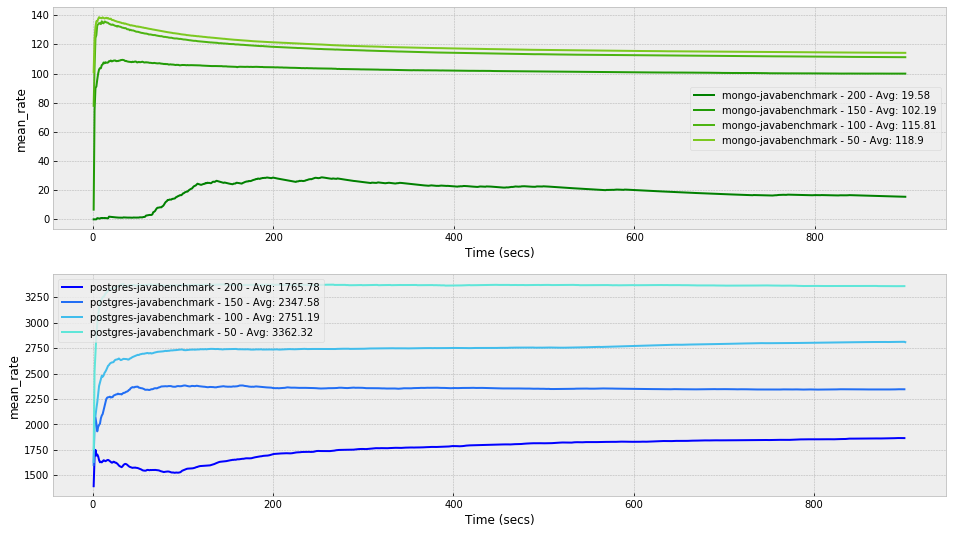

In [45]:
plt.rcParams["figure.figsize"] = [16,9]
fig = plt.figure(1)
plt.subplot(211)
m = plotJavabench('b2b9f160-48cb-ca90-e3cf-a97303c30866')
plt.legend()

plt.subplot(212)
p = plotJavabench('e0b18a72-8b1a-0810-e1b8-05b237429ba8', colour="blue")
plt.legend()

plt.show()

 * postgresql://postgres@localhost:5432/javabench
4 rows affected.
 * postgresql://postgres@localhost:5432/javabench
1 rows affected.
 * postgresql://postgres@localhost:5432/javabench
900 rows affected.
 * postgresql://postgres@localhost:5432/javabench
900 rows affected.
 * postgresql://postgres@localhost:5432/javabench
900 rows affected.
 * postgresql://postgres@localhost:5432/javabench
900 rows affected.
 * postgresql://postgres@localhost:5432/javabench
4 rows affected.
 * postgresql://postgres@localhost:5432/javabench
1 rows affected.
 * postgresql://postgres@localhost:5432/javabench
900 rows affected.
 * postgresql://postgres@localhost:5432/javabench
900 rows affected.
 * postgresql://postgres@localhost:5432/javabench
901 rows affected.
 * postgresql://postgres@localhost:5432/javabench
900 rows affected.


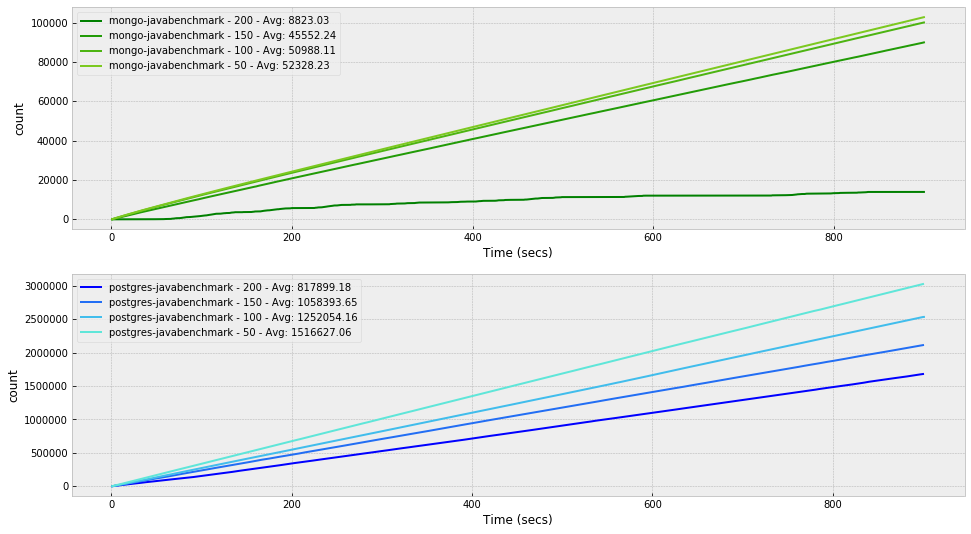

In [46]:
plt.rcParams["figure.figsize"] = [16,9]
fig = plt.figure(1)
plt.subplot(211)
m = plotJavabench('b2b9f160-48cb-ca90-e3cf-a97303c30866', column="count")
plt.legend()

plt.subplot(212)
p = plotJavabench('e0b18a72-8b1a-0810-e1b8-05b237429ba8', colour="blue", column="count")
plt.legend()

plt.show()